<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Lab: Fun with Neural Nets

---

Below is a procedure for building a neural network to recognize handwritten digits.  The data is from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data), and you will submit your results to Kaggle to test how well you did!

1. Load the training data (`train.csv`) from [Kaggle](https://www.kaggle.com/c/digit-recognizer/data)
2. Setup X and y (feature matrix and target vector)
3. Split X and y into train and test subsets.
4. Preprocess your data

   - When dealing with image data, you need to normalize your `X` by dividing each value by the max value of a pixel (255).
   - Since this is a multiclass classification problem, keras needs `y` to be a one-hot encoded matrix
   
5. Create your network.

   - Remember that for multi-class classification you need a softamx activation function on the output layer.
   - You may want to consider using regularization or dropout to improve performance.
   
6. Trian your network.
7. If you are unhappy with your model performance, try to tighten up your model by adding hidden layers, adding hidden layer units, chaning the activation functions on the hidden layers, etc.
8. Load in [Kaggle's](https://www.kaggle.com/c/digit-recognizer/data) `test.csv`
9. Create your predictions (these should be numbers in the range 0-9).
10. Save your predictions and submit them to Kaggle.

---

For this lab, you should complete the above sequence of steps for _at least_ two of the four "configurations":

1. Using a `tensorflow` network (we did _not_ cover this in class!)
2. Using a `keras` convolutional network
3. Using a `keras` network with regularization
4. Using a `tensorflow` convolutional network (we did _not_ cover this in class!)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Keras imports
from tensorflow.keras.models import Sequential # Sequential class to sequentially build the model step-by-step
from tensorflow.keras.optimizers import Adam # Adam optimizer can still be used for CNNs

# Dense: fully connected layers for NNs model, Dropout: to add regularization,
# Flatten: to apply flattening (vector transformation)
# Convolution imports: Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D

from tensorflow.keras import utils # to one-hot encode response variable 
from tensorflow.keras.datasets import mnist # to access multi-class classification dataset from within keras

In [71]:
np.random.seed(42)

# 1. Load `train.csv` from data folder

In [72]:
hwd = pd.read_csv('./data/train.csv')

In [73]:
hwd.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
hwd.shape

(42000, 785)

There are 42,000 datapoints and 784 pixels (28 by 28).

Each pixel has a value chosen from 0 to 255.

# 2. Setup X and y

In [75]:
X = hwd.drop(columns=['label'])
y = hwd['label']

# 3. Split into train and test

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [77]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
31725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
y_train.head()

31725    7
22274    8
17994    5
13484    8
20668    4
Name: label, dtype: int64

# 4. Preprocessing

### 4.1 Normalize X

In [79]:
# We know that the current range of values in X_train and X_test is capped between 0 and 255 -> advantage of image data
# We can directly standardize them by dividing by 255, to take values between 0 and 1. Direct & efficient approach instead of using StandardScalar()
X_train = X_train/255.
X_test = X_test/255.

### 4.2 One Hot Encode y

In [80]:
# One of the ways to one-hot encode y_train to categorical is using keras utils.to_categorical by specifying number of classes (10 for this case, between 0 to 9)
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [81]:
# Check 1st 10 classes in y_train again - we've changed y_train from a 1-D array of classes into a 2-D matrix
# Each row in this encoded matrix is a one-hot encoded vector of each class
# see previous y_train above, 7, 8, 5, 8, 4
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [82]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

# 5. Create network

### 5.1 Using `keras` CNN

In [83]:
# Instantiate a CNN model.
cnn_model = Sequential() # instantiating an empty model of Sequential class

In [84]:
# Add a convolutional layer to the instantiated empty model.
# Conv2D for 2-D convolution on image
cnn_model.add(Conv2D(filters=20,          # number of filters 
                     kernel_size=(3, 3),  # height/width of filter
                     padding='same',      # Ensure Output is same shape as Input
                     activation='relu',   # most popular activation function choice for convolution layers. these are hidden layers too
                     input_shape=(28, 28, 1)))

c:\Users\muzaf\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [85]:
# Recap: EVERY convolution layer is followed by a pooling layer. let's add one with a pooling window 2 x 2!
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # dimensions of region of pooling

In [86]:
# Add another Conv2D and pooling layers (power of NNs! we can keep chaining multiple layers one after another)
# we don't need to specify input for this Conv2D layer anymore,
# let's change no. of filters to just 10 (a hyperparameter we can tweak!)
cnn_model.add(Conv2D(filters=10,
                     kernel_size = (3, 3), # same as above
                     padding='same', # same as above
                     activation='relu')) # same as above

cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # dimensions of region of pooling (same as above pooling)

In [87]:
# Flatten added after MaxPooling2D operates to flatten n-dimensional array into 1-D vector
cnn_model.add(Flatten())

In [88]:
# Add some fully connected layers once we have 1-D vector from 'Flatten()'
# Keeping it simpler this time (1 dense layer lighter, no 32-node layer here vs previous configuration)
cnn_model.add(Dense(128, activation='relu')) # 1 hidden layer with 128 nodes, relu activation
cnn_model.add(Dense(10, activation='softmax')) # output layer with 10 nodes, softmax activation for multi-class classification

# Check out the model summary to confirm all our additions so far.
cnn_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 20)     │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 10)     │         1,810 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 490)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        62,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,148 (258.39 KB)

 Trainable params: 66,148 (258.39 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
# Compile model.
opt = Adam(learning_rate=0.001) # create Adam optimizer with 1e-3 learning rate (same as before)
cnn_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) # same as before

### 5.2 Using FFNN with regularization

In [90]:
model_dropout = Sequential() # instantiate empty model_dropout of Sequential class

model_dropout.add(Flatten(input_shape=(28, 28, 1))) # adding Flatten as 1 of the layers in the NN model 

# Let's create a fully-connected, feed-forward neural net with 3 layers following the flatten layer as follows:
# one 128-node hidden layer (after flatten layer) with ReLU activation, and dropout rate
# one 32-node hidden layer with ReLU activation, and dropout rate
# one 10-node output layer (multiclass classification) with softmax activation
model_dropout.add(Dense(128, activation="relu"))
model_dropout.add(Dropout(0.5))

model_dropout.add(Dense(32, activation="relu"))
model_dropout.add(Dropout(0.5))

model_dropout.add(Dense(10, activation="softmax")) # no. of nodes = no. of classes (10 numbers from 0 to 9)

model_dropout.summary()

c:\Users\muzaf\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
# Compile model. (same as what we've been consistently doing so far)
opt = Adam(learning_rate=0.001) # create an optimizer using Adam with learning rate 1e-3
model_dropout.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy']) 
# compile model_dropout with 'categorical_crossentropy' loss, Adam optimizer & measure accuracy

# 6. Training models

### 6.1 Training CNN model

In [92]:
# Fit model on training data & validate
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256, # hyperparameter than can be tuned
                        validation_data=(X_test, y_test),
                        epochs=10) # can increase this in combination with applying EarlyStopping

Epoch 1/10


124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - accuracy: 0.6567 - loss: 1.2451 - val_accuracy: 0.9103 - val_loss: 0.2810
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9230 - loss: 0.2464 - val_accuracy: 0.9515 - val_loss: 0.1567
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9558 - loss: 0.1492 - val_accuracy: 0.9604 - val_loss: 0.1270
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9657 - loss: 0.1103 - val_accuracy: 0.9710 - val_loss: 0.0909
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9763 - loss: 0.0786 - val_accuracy: 0.9766 - val_loss: 0.0757
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9811 - loss: 0.0608 - val_accuracy: 0.9716 - val_loss: 0.0901
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9799 - loss: 0.0636 - val_accuracy: 0.9779 - val_loss: 0.0694
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9849 - loss: 0.0467 - val_accuracy: 0.979

### 6.2 Training FFNN with regularization

In [93]:
history_dropout = model_dropout.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test), 
    epochs=10,
    batch_size=256
)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3906 - loss: 1.7599 - val_accuracy: 0.8837 - val_loss: 0.4586
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7502 - loss: 0.7983 - val_accuracy: 0.9130 - val_loss: 0.3147
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8189 - loss: 0.6103 - val_accuracy: 0.9197 - val_loss: 0.2742
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8491 - loss: 0.5182 - val_accuracy: 0.9315 - val_loss: 0.2385
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8644 - loss: 0.4599 - val_accuracy: 0.9364 - val_loss: 0.2151
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8825 - loss: 0.4160 - val_accuracy: 0.9410 - val_loss: 0.2004
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8908 - loss: 0.3945 - val_accuracy: 0.9446 - val_loss: 0.1904
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8945 - loss: 0.3788 - val_accuracy: 0.

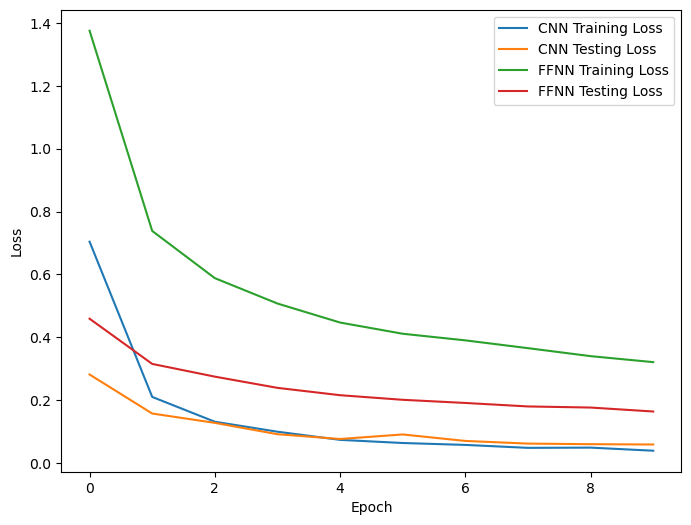

In [95]:
# Check out our train loss and test loss over epochs.
train_loss_cnn = history.history['loss']
test_loss_cnn = history.history['val_loss']
train_loss_dropout = history_dropout.history['loss']
test_loss_dropout = history_dropout.history['val_loss']

# Set figure size.
plt.figure(figsize=(8, 6))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss_cnn, label='CNN Training Loss')
plt.plot(test_loss_cnn, label='CNN Testing Loss')
plt.plot(train_loss_dropout, label='FFNN Training Loss')
plt.plot(test_loss_dropout, label='FFNN Testing Loss')

# Set title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

# 8. Load `test.csv`

In [96]:
test = pd.read_csv('./data/test.csv')

In [97]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
test = test / 255
test = test.values.reshape(-1,28,28,1)

# 9. Create predictions

In [100]:
cnn_results = cnn_model.predict(test)
ffnn_results = model_dropout.predict(test)

# select the index with the maximum probability
cnn_results = np.argmax(cnn_results,axis = 1)
ffnn_results = np.argmax(ffnn_results,axis = 1)

cnn_results = pd.Series(cnn_results,name="Label")
ffnn_results = pd.Series(ffnn_results,name="Label")

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [103]:
cnn_results

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

# 10. Save predictions

In [104]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),cnn_results],axis = 1)

submission.to_csv("cnn_results.csv",index=False)